In [3]:
import pandas as pd
import matplotlib.pyplot as plt 


In [29]:
def pseudoknots_count(seq):

    b1 = 0
    b2 = 0
    b3 = 0
    for s in seq:
        if s == '(':
            b1 += 1

        elif s == '[':
            b2 += 1

        elif s == '{':
            b3 += 1

    pseudo1 = (b2/(b1+b2+b3))*100
    pseudo2 = (b3/(b1+b2+b3))*100

    print('% of [', '% of {', sep='     ')
    print(round(pseudo1, 2), '%','   ', round(pseudo2, 2),'%')


In [ ]:
def find_matching_parentheses_indexes(s):
    stack1 = []
    stack2 = []
    stack3 = []
    result = []
    
    for i, char in enumerate(s):
        if char == '(':
            stack1.append(i)
        elif char == '[':
            stack2.append(i)
        elif char == '{':
            stack3.append(i)
        elif char == ')':
            if stack1:
                result.append((stack1.pop(), i))
        elif char == ']':
            if stack2:
                result.append((stack2.pop(), i))
        elif char == '}':
            if stack3:
                result.append((stack3.pop(), i))
    
    return result

def gu_count(seq, seq2d):
    gu = [('G', 'U'), ('U', 'G'), ('G', 'T'), ('T', 'G')]

    pairs = find_matching_parentheses_indexes(seq2d)
    l = len(pairs)
    counter = 0
    for pair in pairs:
        if (seq[pair[0]], seq[pair[1]]) in gu:
            counter +=1

    ans = (counter*100)/l
    print('G-U =', round(ans, 2), '% of pairs')

def pairscount(seq):
    brackets = list('()[]{}')
    counter = 0

    for s in seq:
        if s in brackets:
            counter += 1

    ans = (counter/len(seq))*100
    print('% of paired nt out of all nt =', round(ans, 2))




<Axes: >

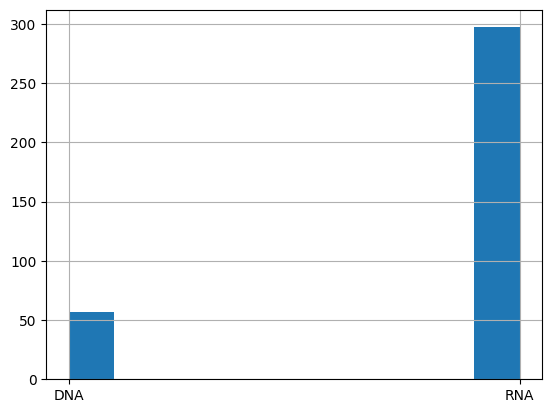

In [49]:
db = pd.read_csv('data.csv')
db['NAtype'].hist()

In [43]:
dnarna = ''.join(list(db['2D']))
dnarna_seq = ''.join(list(db['Sequence']))

rnadb = db[db['NAtype'] == 'RNA']
rna = ''.join(list(rnadb['2D']))
rna_seq = ''.join(list(rnadb['Sequence']))

dnadb = db[db['NAtype'] == 'DNA']
dna = ''.join(list(dnadb['2D']))
dna_seq = ''.join(list(dnadb['Sequence']))

In [51]:
print('% of paired nt')
print('---------')
print('DNA+RNA')
pairscount(dnarna)
print('---------')
print('RNA')
pairscount(rna)
print('---------')
print('DNA')
pairscount(dna)

% of paired nt
---------
DNA+RNA
% of paired nt out of all nt = 59.0
---------
RNA
% of paired nt out of all nt = 59.78
---------
DNA
% of paired nt out of all nt = 49.92


In [ ]:
print('% of pseudoknoted base pairs of all base pairs')
print('---------')
print('DNA+RNA')
pseudoknots_count(dnarna)
print('---------')
print('RNA')
pseudoknots_count(rna)
print('---------')
print('DNA')
pseudoknots_count(dna)

% of pseudoknoted base pairs of all base pairs
---------
DNA+RNA
% of [     % of {
8.3 %     0.55 %
---------
RNA
% of [     % of {
8.68 %     0.59 %
---------
DNA
% of [     % of {
2.97 %     0.0 %


In [47]:
print('% of G-U/G-T base pairs of all base pairs')
print('---------')
print('DNA+RNA')
gu_count(dnarna_seq, dnarna)
print('---------')
print('RNA')
gu_count(rna_seq, rna)
print('---------')
print('DNA')
gu_count(dna_seq, dna)

% of G-U/G-T base pairs of all base pairs
---------
DNA+RNA
G-U = 6.05 % of pairs
---------
RNA
G-U = 6.22 % of pairs
---------
DNA
G-U = 3.61 % of pairs
